In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
video = 'July/videos/video_capture_2024-07-01_09-08-21.mp4'
cap = cv2.VideoCapture(video)
_, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

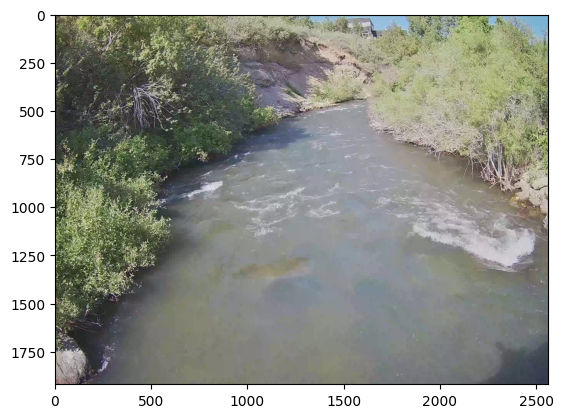

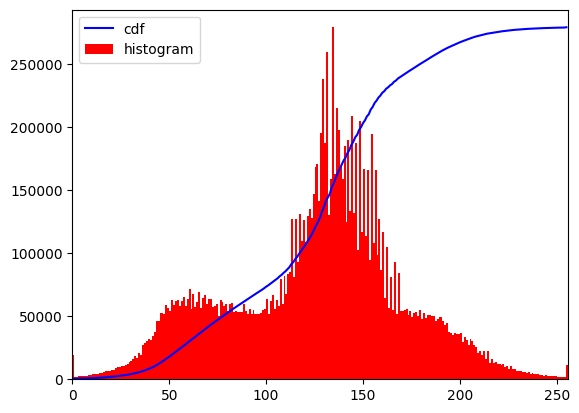

In [33]:
img = frame.copy()

plt.imshow(img, cmap='gray')
plt.show()
plt.close()
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [34]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [35]:
img2 = cdf[img]

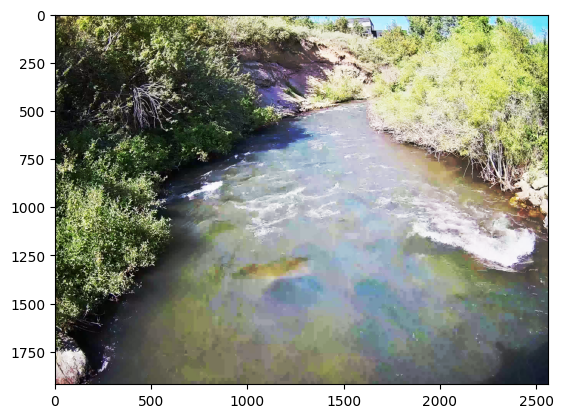

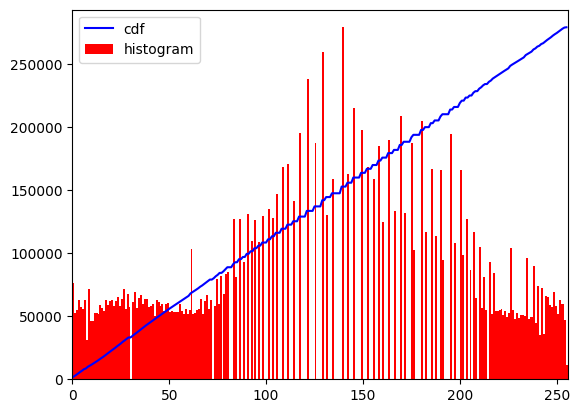

In [36]:
plt.imshow(img2, cmap='gray')
plt.show()
plt.close()
 
hist,bins = np.histogram(img2.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [37]:
img = frame.copy()

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.imshow(img)
plt.show(); plt.close()
 
# plt.imshow(cl1, cmap='gray')
plt.imshow(cl1)
plt.show(); plt.close()
 
hist,bins = np.histogram(cl1.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 

plt.plot(cdf_normalized, color = 'b')
plt.hist(cl1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
 
cv2.imwrite('clahe_test_out.jpg',cl1)

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'
